# Notebook to visualize graph latent space

In [1]:
import sys,os,pandas
import numpy as np
sys.path.append(os.path.expanduser('../../src/ml'))
# sys.path.append(os.path.expanduser('..'))

from load_matrix import load_df, _load_filtered_entities

In [34]:
version='v2.11'
norm_type='minmax'

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LinearSegmentedColormap

blueish_gradient = LinearSegmentedColormap.from_list(
    "blueish_gradient",
    [
        "#004E7D",
        "#0E87C9",
        "#0094B5",
        "#46C3D2",
        "#00807A",
        "#40B769",
        "#8CC63E",
        "#D5DF3D",
    ],
    N=256
)



## 1. All node classes embeddings

Projection of node embeddings colored by their class

### model definition

`ComplEx` and `RGCN` for now

In [33]:
model='ComplEx'

In [59]:
df=_load_filtered_entities(model,version,'')
df['class']=df['node_id'].apply(lambda x: x.split('_')[0])

 Complex embeddings detected in /mnt/c/Users/rayan/Documents/saclay/courses/deep-learning-and-artifical-intelligence/project/2526-m2geniomhe-GNN-sepsis/notebooks/viz/../../models/executions/GSE54514_enriched_ontology_degfilterv2.11/outputmodel_ComplEx_entity_embeddings.npy, splitting real+imag.


In [60]:
df.iloc[:,5:df.shape[1]-1]

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_190,emb_191,emb_192,emb_193,emb_194,emb_195,emb_196,emb_197,emb_198,emb_199
0,-3.837191,-0.614155,1.499356,-4.311685,-5.370530,1.221993,11.512136,2.893684,-20.007824,-13.061667,...,-5.345125,3.718016,-3.496841,3.115153,2.593753,-0.836372,-3.021516,3.708978,8.019621,0.610315
1,-5.070963,-0.254380,-1.109585,6.089280,3.406363,2.391310,0.107864,-4.259182,-11.416837,-2.631203,...,-1.973810,-5.607207,6.456459,-3.326375,0.207856,1.447785,2.232963,-0.208907,-6.800537,4.295553
2,-3.672044,5.142236,-0.686417,2.699080,4.063172,-1.518527,-1.608591,5.004957,-13.032231,8.559210,...,4.059080,2.474560,3.099409,3.124347,-7.886050,-0.417701,3.555441,0.418716,-4.254946,-11.632294
3,1.256520,-1.635126,-0.291352,0.016303,-1.542102,1.469316,1.279222,1.698803,-12.265176,-0.218552,...,2.940727,1.640933,2.715072,-1.683907,-2.174782,1.576797,3.359914,1.522987,-3.357687,3.539298
4,1.016957,2.038682,1.844460,-1.650478,0.691949,0.340404,1.140677,-0.005729,-3.537621,3.741560,...,-0.053810,4.530461,1.703016,-0.124760,-0.791561,2.001722,4.360128,-0.910792,1.300700,-2.268037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,0.291708,-0.006770,1.432140,-0.184320,2.135234,-0.232475,1.880197,-0.231125,-1.674513,0.115315,...,-0.119581,-1.171638,1.130930,0.607569,-0.160598,1.653878,0.188031,2.638073,-0.959536,-0.634636
18266,0.291708,-0.006770,1.432140,-0.184320,2.135234,-0.232475,1.880197,-0.231125,-1.674513,0.115315,...,-0.119581,-1.171638,1.130930,0.607569,-0.160598,1.653878,0.188031,2.638073,-0.959536,-0.634636
18267,0.291708,-0.006770,1.432140,-0.184320,2.135234,-0.232475,1.880197,-0.231125,-1.674513,0.115315,...,-0.119581,-1.171638,1.130930,0.607569,-0.160598,1.653878,0.188031,2.638073,-0.959536,-0.634636
18268,0.291708,-0.006770,1.432140,-0.184320,2.135234,-0.232475,1.880197,-0.231125,-1.674513,0.115315,...,-0.119581,-1.171638,1.130930,0.607569,-0.160598,1.653878,0.188031,2.638073,-0.959536,-0.634636


In [61]:
df['class']
#-- remove rows with df['class']='Reaction'
# df=df[df['class']!='Reaction']

0            GO
1            GO
2            GO
3            GO
4            GO
          ...  
18265    Sample
18266    Sample
18267    Sample
18268    Sample
18269    Sample
Name: class, Length: 18270, dtype: object

In [62]:
# -- umap of all embeddings colored by class

import umap
import matplotlib.pyplot as plt
import seaborn as sns
reducer = umap.UMAP()
embedding_umap = reducer.fit_transform(df.iloc[:,5:df.shape[1]-1].values)

# -- pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:,5:df.shape[1]-1].values)
embedding_pca = pca_result

# -- tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=40)
tsne_result = tsne.fit_transform(df.iloc[:,5:df.shape[1]-1].values)
embedding_tsne = tsne_result


In [109]:
colors = {
    "GO": "#7C2A90",              # secondary-5 (purple)
    "Pathway": "#40B769",         # secondary-14 (green)
    "PatientSample": "#ED145B",   # secondary-2 (strong pink/red)
    "Protein": "#0094B5",         # secondary-10 (deep blue)
    "Reaction": "#F37320",      # secondary-4 (orange)
    "Sample": "#FEBC18",        # secondary-8 (yellow)
}


### umap

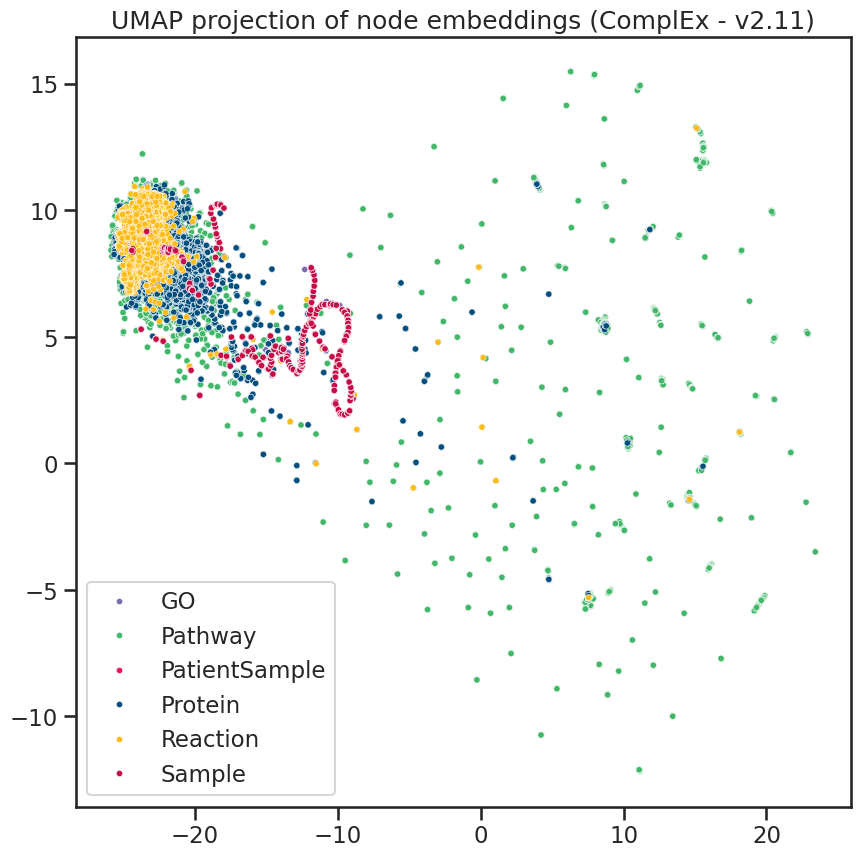

In [64]:

plt.figure(figsize=(10,10))
sns.scatterplot(x=embedding_umap[:,0], y=embedding_umap[:,1], hue=df['class'], palette=colors, s=20)
plt.title(f'UMAP projection of node embeddings ({model} - {version})')
plt.legend()
plt.show()

### pca

In [101]:
# plt.figure(figsize=(10,10))
# sns.scatterplot(x=embedding_pca[:,0], y=embedding_pca[:,1], hue=df['class'], palette=colors, s=20)
# plt.title(f'PCA projection of node embeddings ({model} - {version})')
# plt.legend()
# plt.show()  

In [114]:
colors = {
    "GO": "#7C2A90",              # secondary-5 (purple)
    "Pathway": "#8CC63E",         # secondary-15 (green)
    "PatientSample": "#ED145B",   # secondary-2 (strong pink/red)
    "Protein": "#0094B5",         # secondary-10 (deep blue)
    "Reaction": "#F37320",      # secondary-4 (orange)
    "Sample": "#FEBC18",        # secondary-8 (yellow)
}


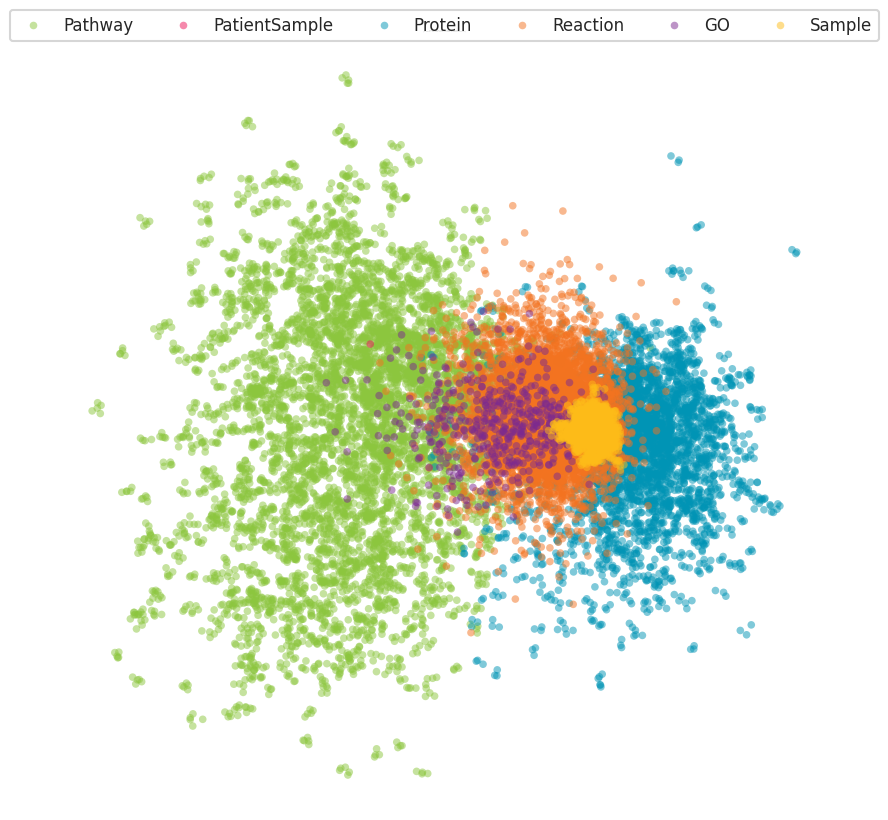

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", context="talk")

# ---- small jitter (does NOT distort global structure)

# 1. Create a sorting key: 1 if class is 'GO', 0 otherwise
# This ensures 'GO' rows are at the end of the dataframe
df_sorted = df.copy()
df_sorted['is_go'] = (df_sorted['class'] == 'GO')
df_sorted['is_sample'] = (df_sorted['class'] == 'Sample')
df_sorted = df_sorted.sort_values(by=['is_sample', 'is_go'])
# df_sorted = df_sorted.sort_values(by='is_go')

# 2. Re-calculate jittered x and y based on the new order
jitter = 0.3
x_sorted = embedding_pca[df_sorted.index, 0] + np.random.normal(0, jitter, size=df_sorted.shape[0])
y_sorted = embedding_pca[df_sorted.index, 1] + np.random.normal(0, jitter, size=df_sorted.shape[0])



color_values = df.iloc[:, 5 + emb]
color_values_abs = np.abs(color_values)

plt.figure(figsize=(10,10))

sc = sns.scatterplot(
    x=x_sorted,
    y=y_sorted,
    hue=df_sorted['class'],
    palette=colors,
    s=30,
    alpha=0.5,
    linewidths=0
)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(
    f"PCA projection of protein embeddings\n({model} – version={version}, colored by embedding {emb})",
    fontsize=1,
    weight="bold"
)

# ---- tidy axes
# sns.despine()
# plt.tick_params(axis='both', which='major', labelsize=11)

# axis labels (keep labels, remove numbers)
plt.xlabel("UMAP 1", fontsize=13)
plt.ylabel("UMAP 2", fontsize=13)

# remove tick numbers
plt.xticks([])
plt.yticks([])


# cbar = plt.colorbar(sc)
# cbar.set_label(f"Embedding {emb}", rotation=270, labelpad=15)

plt.axis("off")
plt.legend(loc='upper center', fontsize=12, bbox_to_anchor=(.5, 1.05), ncol=6)
# plt.tight_layout()
plt.show()


### tsne

In [156]:
SECONDARY_COLORS = {
    1: "#C60B46",  # pms-1945
    2: "#ED145B",  # pms-206
    3: "#EE3524",  # pms-1795
    4: "#F37320",  # pms-1665
    5: "#7C2A90",  # pms-2602
    6: "#7D6AAF",  # pms-2725
    7: "#C6671D", # pms-153
    8: "#FEBC18", # pms-123
    9: "#004E7D",  # pms-295
    10: "#0E87C9", # pms-2935
    11: "#0094B5", # pms-314
    12: "#46C3D2", # pms-3115
    13: "#00807A",  # pms-3292
    14: "#40B769", # pms-355
    15: "#8CC63E", # pms-376
    16: "#D5DF3D" # pms-381
}

# Map each class to a color
custom_palette = {
    "Protein": SECONDARY_COLORS[9],        # blue or even 11
    "Pathway": SECONDARY_COLORS[14],       # green
    "Sample": SECONDARY_COLORS[8],        # yellow
    "PatientSample": SECONDARY_COLORS[8], # yellow (same as sample)
    "Reaction": SECONDARY_COLORS[12],      # cyan/light blue, neutral
    "GO": SECONDARY_COLORS[5],             # purple or 6
}


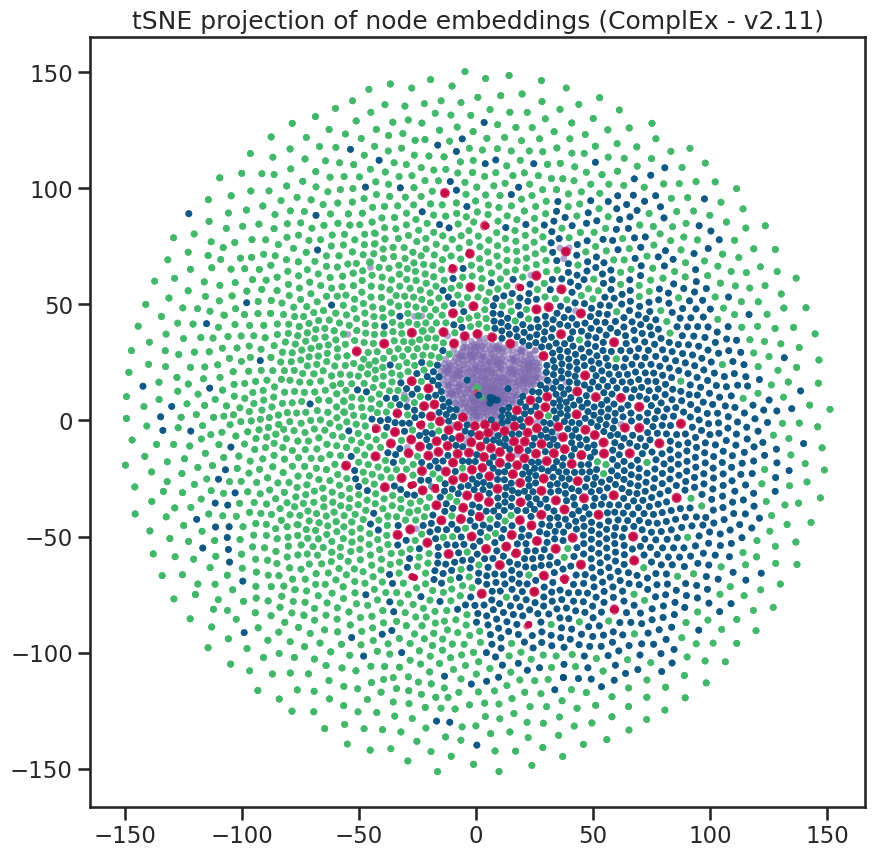

In [56]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    x=embedding_tsne[:, 0],
    y=embedding_tsne[:, 1],
    hue=df['class'],
    palette=colors,
    s=24,          # marker size
    alpha=0.6,     # transparency for overlapping points
    edgecolor=None,  # remove black edges for cleaner look
    linewidths=0,
    legend=False
)
plt.title(f'tSNE projection of node embeddings ({model} - {version})')
# -- remove legend

plt.show()


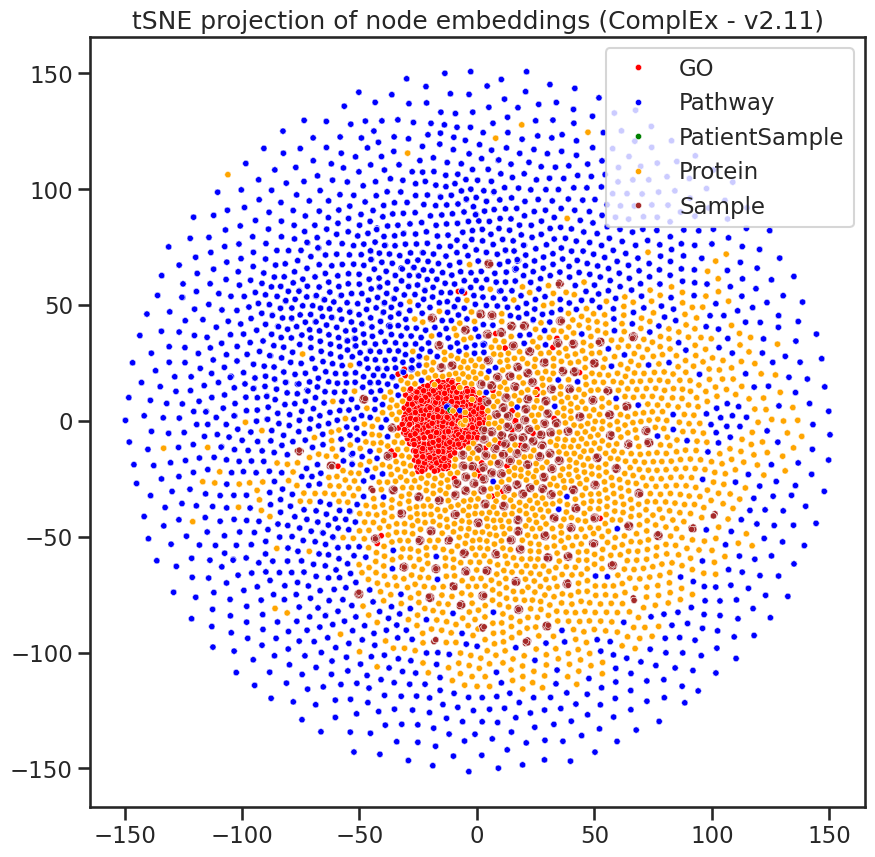

In [158]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=embedding_tsne[:,0], y=embedding_tsne[:,1], hue=df['class'], palette=colors, s=20)
plt.title(f'tSNE projection of node embeddings ({model} - {version})')
plt.legend()
plt.show()

## 2. proteins node embeddings

In [21]:
model='ComplEx'

In [22]:
df=_load_filtered_entities(model,version,'Protein')
df.iloc[:,5:df.shape[1]-1]

 Complex embeddings detected in /mnt/c/Users/rayan/Documents/saclay/courses/deep-learning-and-artifical-intelligence/project/2526-m2geniomhe-GNN-sepsis/notebooks/viz/../../models/executions/GSE54514_enriched_ontology_degfilterv2.10/outputmodel_ComplEx_entity_embeddings.npy, splitting real+imag.


,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_189,emb_190,emb_191,emb_192,emb_193,emb_194,emb_195,emb_196,emb_197,emb_198
7224,-0.617301,5.868161,-1.085886,-0.139031,-6.370385,0.504347,-3.819961,2.322333,0.442709,2.914857,...,-2.183412,1.592991,1.811439,5.116461,0.056212,4.858486,2.305987,-0.796394,0.920511,10.055500
7225,-2.509974,4.398898,-3.782592,9.479776,-9.734801,3.441568,-3.153900,-15.230906,8.334370,-3.419079,...,-1.956802,-2.640464,9.485981,8.005071,14.672046,0.085490,9.304512,2.591553,-2.864973,-3.900090
7226,-2.509974,4.398898,-3.782592,9.479776,-9.734801,3.441568,-3.153900,-15.230906,8.334370,-3.419079,...,-1.956802,-2.640464,9.485981,8.005071,14.672046,0.085490,9.304512,2.591553,-2.864973,-3.900090
7227,-2.509974,4.398898,-3.782592,9.479776,-9.734801,3.441568,-3.153900,-15.230906,8.334370,-3.419079,...,-1.956802,-2.640464,9.485981,8.005071,14.672046,0.085490,9.304512,2.591553,-2.864973,-3.900090
7228,0.406427,3.058400,5.495103,-1.553725,1.301869,2.276537,1.072287,-4.077550,-0.943426,-1.480135,...,-1.599365,10.988233,-0.385287,-5.137246,4.512245,0.766409,8.578665,8.192780,0.686986,1.597278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11086,-5.833541,0.227846,1.363709,7.365244,4.258060,2.519170,-1.628099,-2.403975,-6.591419,-1.335142,...,-1.705503,2.771830,1.734143,-2.190489,-5.193799,1.848183,-2.476816,-3.415275,-1.428645,2.111783
11087,-5.833541,0.227846,1.363709,7.365244,4.258060,2.519170,-1.628099,-2.403975,-6.591419,-1.335142,...,-1.705503,2.771830,1.734143,-2.190489,-5.193799,1.848183,-2.476816,-3.415275,-1.428645,2.111783
11088,-4.006022,2.205475,-5.041567,-2.673204,-1.839708,-3.667799,-3.711062,-2.394285,3.830617,-5.776543,...,2.120190,2.666039,1.784294,5.085724,-4.143923,2.599180,-7.281944,-0.753431,0.040339,-9.816345
11089,-4.006022,2.205475,-5.041567,-2.673204,-1.839708,-3.667799,-3.711062,-2.394285,3.830617,-5.776543,...,2.120190,2.666039,1.784294,5.085724,-4.143923,2.599180,-7.281944,-0.753431,0.040339,-9.816345


In [23]:
# -- checking for structure, might want to colo through converging scale for interpretability (embedding loadings)


import umap
import matplotlib.pyplot as plt
import seaborn as sns
reducer = umap.UMAP()
embedding_umap = reducer.fit_transform(df.iloc[:,5:df.shape[1]-1].values)

# -- pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:,5:df.shape[1]-1].values)
embedding_pca = pca_result

# -- tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=40)
tsne_result = tsne.fit_transform(df.iloc[:,5:df.shape[1]-1].values)
embedding_tsne = tsne_result

#### testing plots

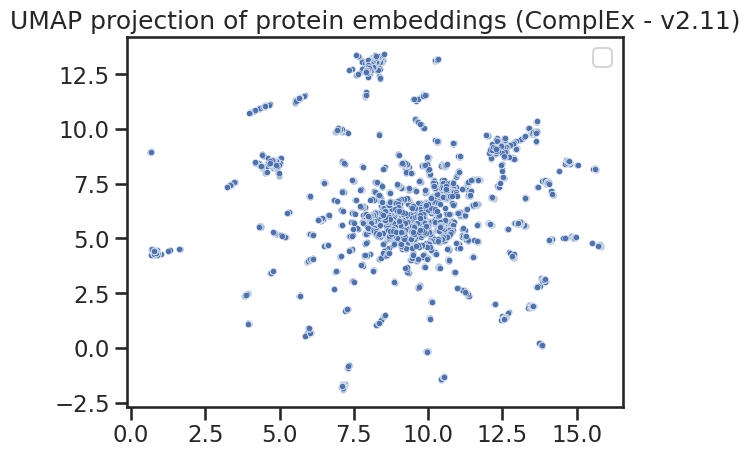

In [162]:
sns.scatterplot(x=embedding_umap[:,0], y=embedding_umap[:,1],  s=20)
plt.title(f'UMAP projection of protein embeddings ({model} - {version})')
plt.legend()
plt.show()

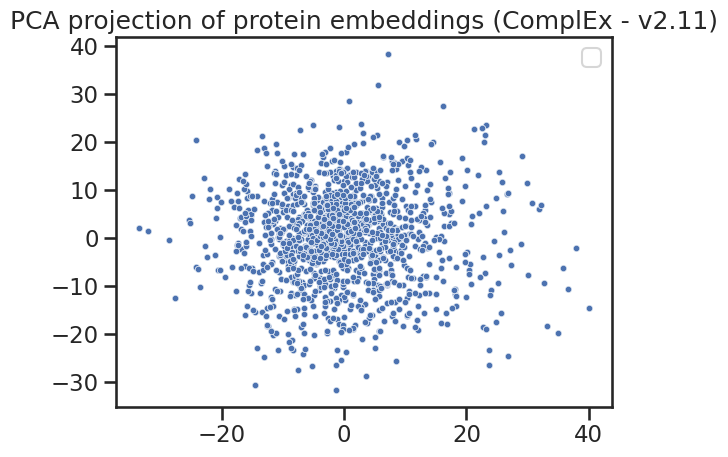

In [163]:
sns.scatterplot(x=embedding_pca[:,0], y=embedding_pca[:,1],  s=20)
plt.title(f'PCA projection of protein embeddings ({model} - {version})')
plt.legend()
plt.show()

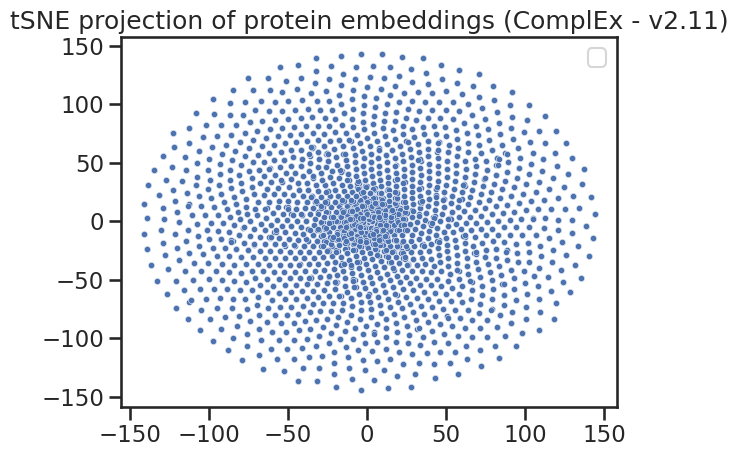

In [164]:
sns.scatterplot(x=embedding_tsne[:,0], y=embedding_tsne[:,1],  s=20)
plt.title(f'tSNE projection of protein embeddings ({model} - {version})')
plt.legend()
plt.show()

### coloring by embedding weight

In [7]:
colors_sorted = [
    "#004E7D",  # darkest blue (pms-295)
    "#0E87C9",  # blue (pms-2935)
    "#0094B5",  # blue–cyan (pms-314)
    "#00807A",  # teal (pms-3292)
    "#46C3D2",  # light cyan (pms-3115)
    "#40B769",  # green (pms-355)
    "#8CC63E",  # yellow-green (pms-376)
    "#D5DF3D",  # light yellow-green (pms-381)
]
colors_cleaned = [
    "#004E7D",  # dark blue (pms-295)
    "#0E87C9",  # medium blue (pms-2935)
    "#0094B5",  # teal-cyan (pms-314)
    "#40B769",  # green (pms-355)
    "#8CC63E",  # yellow-green (pms-376)
    "#D5DF3D",  # light yellow-green (pms-381)
]
from matplotlib.colors import LinearSegmentedColormap

blueish_gradient = LinearSegmentedColormap.from_list(
    "blueish_gradient",
    colors_cleaned,
    N=256
)


In [24]:
# == color by gradient by embedding value
emb=127

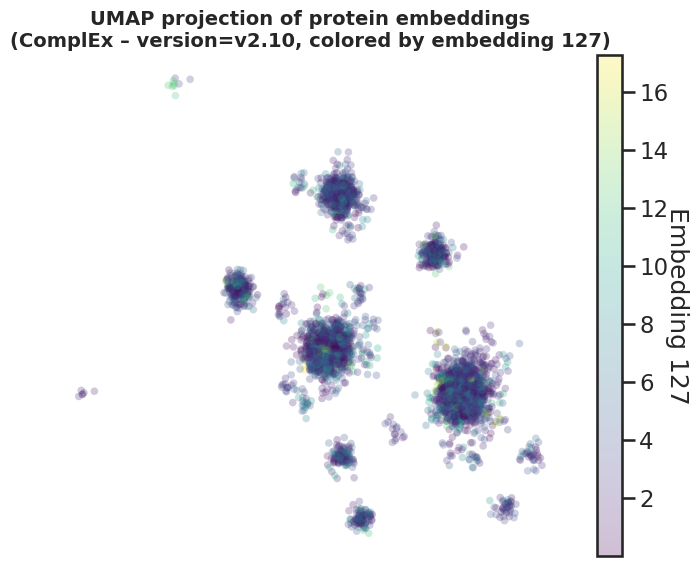

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", context="talk")

# ---- small jitter (does NOT distort global structure)
jitter = 0.3
x = embedding_umap[:, 0] + np.random.normal(0, jitter, size=embedding_umap.shape[0])
y = embedding_umap[:, 1] + np.random.normal(0, jitter, size=embedding_umap.shape[0])

color_values = df.iloc[:, 5 + emb]
color_values_abs = np.abs(color_values)

plt.figure(figsize=(7,6))

sc = plt.scatter(
    x,
    y,
    c=color_values_abs,
    cmap='viridis',
    s=30,
    alpha=0.85,
    linewidths=0
)

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title(
    f"UMAP projection of protein embeddings\n({model} – version={version}, colored by embedding {emb})",
    fontsize=14,
    weight="bold"
)

# ---- tidy axes
# sns.despine()
# plt.tick_params(axis='both', which='major', labelsize=11)

# axis labels (keep labels, remove numbers)
plt.xlabel("UMAP 1", fontsize=13)
plt.ylabel("UMAP 2", fontsize=13)

# remove tick numbers
plt.xticks([])
plt.yticks([])


cbar = plt.colorbar(sc)
cbar.set_label(f"Embedding {emb}", rotation=270, labelpad=15)

plt.axis("off")

plt.tight_layout()
plt.show()


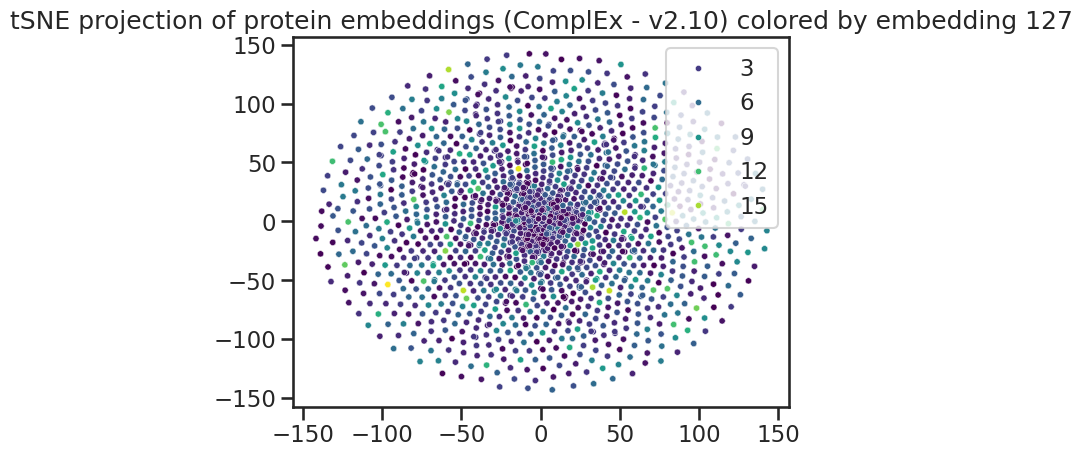

In [28]:
sns.scatterplot(x=embedding_tsne[:,0], y=embedding_tsne[:,1], hue=np.abs(df.iloc[:,5+emb]), palette='viridis', s=20)
plt.title(f'tSNE projection of protein embeddings ({model} - {version}) colored by embedding {emb}')
plt.legend()
plt.show()
